In [ ]:
import pandas as pd

# ---------------------------------------------------------
# 1. 데이터 로드 및 기본 정보
# ---------------------------------------------------------
df = pd.read_csv('data/data.csv')

# 데이터 크기
print("--- 데이터 크기 ---")
print(f"데이터의 행 개수 (샘플): {df.shape[0]}개")
print(f"데이터의 열 개수 (칼럼): {df.shape[1]}개")

# 데이터 칼럼
print("\n--- 데이터 칼럼 ---")
print("데이터의 칼럼:", list(df.columns))

# 데이터 타입 및 결측값
print("\n--- 데이터 타입 및 결측값 ---")

info_df = pd.DataFrame({
    '데이터 타입': df.dtypes,
    '결측값 개수': df.isnull().sum()
})

info_df.index.name = '데이터 칼럼'
info_df = info_df.reset_index()

styled_df = info_df.style.hide(axis='index') \
    .set_properties(**{'text-align': 'center'}) \
    .set_table_styles([
        {'selector': 'th', 'props': [('text-align', 'center')]}
    ])

display(styled_df)


# 중복된 데이터 샘플

print("\n--- 중복된 데이터 샘플 ---")
duplicate_count = df.duplicated().sum()

print(f"중복된 데이터 샘플: {duplicate_count}개")

--- 데이터 크기 ---
데이터의 행 개수 (샘플): 195개
데이터의 열 개수 (칼럼): 15개

--- 데이터 칼럼 ---
데이터의 칼럼: ['ID', 'PA', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'H_Ratio', '2B_3B_Ratio', 'HR_Ratio', 'SO_Ratio', 'BB_Ratio', 'Batter_Type']

--- 데이터 타입 및 결측값 ---


데이터 칼럼,데이터 타입,결측값 개수
ID,object,0
PA,int64,0
AB,int64,0
H,int64,0
2B,int64,0
3B,int64,0
HR,int64,0
BB,int64,0
SO,int64,0
H_Ratio,float64,0



--- 중복된 데이터 샘플 ---
중복된 데이터 샘플: 0개


### 1. 데이터 로드 및 기본 정보

**1. 데이터 크기**
- 총 195개의 데이터 샘플을 수집하였습니다. 기존의 계획이었던 110개에서 데이터 부족으로 인한 우려를 반영하여 데이터 샘플의 수를 확대하였습니다.
- 2025년 골든글러브 후보 중 타자 50명을 대상으로 최근 5년 간의 기록을 수동으로 수집하였습니다. 표본이 적어 타격 성향을 파악하기 힘든 시즌을 제외하기 위해 50타석 이상 소화한 시즌만 선별하였습니다.
- 출처: [KBO 공식 홈페이지 기록실](https://www.koreabaseball.com/Player/Search.aspx)

**2. 데이터 칼럼**
- 총 15개의 칼럼으로 구성되어 있으며, 3가지 유형으로 분류할 수 있습니다.
---
- 메타 데이터 (2개) : 'ID', 'Batter_Type'
- 'ID'는 타자의 이름과 해당하는 연도로 이루어진 칼럼이고, Batter_Type은 파생
데이터를 기반으로 직접 라벨링한 타자의 유형에 대한 칼럼입니다.
---
- 원천 데이터 (8개) : 'PA(타석)', 'AB(타수)', 'H(안타)', '2B(2루타)', '3B(3루타)', 'HR(홈런)', 'BB(볼넷)', 'SO(삼진)'
- 원천 데이터는 KBO 공식 사이트에서 직접 수집한 단순 누적 기록에 대한 데이터입니다.
---
- 파생 데이터 (5개) : 'H_Ratio(H/AB)', '2B_3B_Ratio((2B+3B)/AB)', 'HR_Ratio(HR/AB)', 'SO_Ratio(SO/PA)', 'BB_Ratio(BB/PA)'
- 파생 데이터는 타격 지표를 타자의 유형 결정에 활용할 수 있도록 원천 데이터를 비율로 변환한 데이터입니다.
---
- 타자의 유형을 판단해주는 모델을 학습하고 평가할 때 활용할 주요한 칼럼은 파생 데이터에 해당하는 5개의 칼럼입니다. 원천 데이터를 사용할 수 없는 이유는 타자마다 소화한 타석 또는 타수의 수가 다르기 때문에, 단순 누적 기록을 활용한 개수 비교는 신뢰할 수 없기 때문입니다. 따라서 타석과 타수의 수를 고려할 수 있는 파생 데이터를 적극적으로 활용할 예정이고, 'Batter_Type'을 직접 라벨링 할 때에도 파생 데이터를 기준으로 라벨링하였습니다.

**3. 데이터 타입 및 결측값**

- 메타 데이터의 타입은 object, 원천 데이터의 타입은 int, 파생 데이터의 타입은 float로 알맞게 출력되었습니다.
- 데이터에 결측값은 존재하지 않는 것으로 출력되었고, 이를 통해 수동으로 진행한 데이터 수집 과정이 실수 없이 성공적으로 이루어졌다고 볼 수 있습니다.

**4. 중복된 데이터 샘플**
- 중복된 데이터 샘플은 존재하지 않는 것으로 출력되었고, 마찬가지로 수동으로 진행한 데이터 수집 과정이 실수 없이 성공적으로 이루어졌다고 볼 수 있습니다.

In [ ]:
# ---------------------------------------------------------
# 2. 기본 통계
# ---------------------------------------------------------

# --- 데이터 기본 통계 ---
print("--- 데이터 기본 통계 (주요 특성) ---")

# 첫번째 테이블

stats_features = ['H_Ratio', '2B_3B_Ratio', 'HR_Ratio', 'SO_Ratio', 'BB_Ratio']

stats_df = df[stats_features].describe()

styled_stats = stats_df.style \
    .format('{:.3f}') \
    .format('{:.0f}', subset=pd.IndexSlice['count', :]) \
    .set_properties(**{'text-align': 'center'}) \
    .set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}])

display(styled_stats)

# 두번째 테이블

type_counts = pd.DataFrame({
    '개수': df['Batter_Type'].value_counts(),
    '비율': df['Batter_Type'].value_counts(normalize=True).mul(100)
})

type_counts.index.name = 'Batter_Type'
type_counts = type_counts.reset_index()

styled_counts = type_counts.style \
    .hide(axis='index') \
    .set_properties(**{'text-align': 'center'}) \
    .set_properties(subset=['Batter_Type'], **{'font-weight': 'bold'}) \
    .set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}]) \
    .format({'비율': '{:.1f}%'})

display(styled_counts)

--- 데이터 기본 통계 (주요 특성) ---


데이터 칼럼,H_Ratio,2B_3B_Ratio,HR_Ratio,SO_Ratio,BB_Ratio
count,195,195,195,195,195
mean,0.274,0.052,0.026,0.168,0.101
std,0.035,0.015,0.018,0.061,0.028
min,0.129,0.013,0.000,0.025,0.021
25%,0.253,0.044,0.011,0.130,0.082
50%,0.273,0.052,0.023,0.161,0.099
75%,0.298,0.060,0.037,0.197,0.116
max,0.360,0.096,0.091,0.373,0.209


Batter_Type,개수,비율
GAP,114,58.5%
CONTACT,43,22.1%
POWER,38,19.5%


### 2. 데이터 기본 통계 (주요 특성)

주요 특성에 해당하는 파생 데이터를 대상으로 분석을 진행하였습니다.

**H_Ratio**
- 이 지표에서 상위 75% 지점(0.298)부터 최대값(0.360)에 해당하는 타자는 'CONTACT'에 해당할 가능성이 높다고 생각합니다.

**2B_3B_Ratio**
- 타자 간의 편차는 0.015로 작은 편입니다.
- 이 지표가 높은 타자는 'GAP'에 해당할 가능성이 높다고 생각하지만, 편차가 작기 때문에 결정적인 역할을 수행하지는 못할 것이라 생각합니다.

**HR_Ratio**
- 타자 간의 편차는 0.018로 작은 편입니다
- 최소값(0.000)부터 상위 75% 지점(0.037)까지는 비교적 완만하게 상승하는 반면, 최대값(0.091)은 이보다 월등히 높은 이상치라고 볼 수 있는 수치를 보여주는데, 이에 해당하는 타자는 'POWER'에 해당한다고 확신할 수 있습니다.
- 데이터에 대한 배경 지식을 바탕으로 추가적인 분석을 진행하면, 홈런을 칠 수 있는 능력은 'POWER' 유형의 타자와 그렇지 않은 타자를 가장 명확하게 구분할 수 있는 지표라고 생각하기 때문에 편차는 작은 편이지만 결정적인 역할을 수행할 것이라 생각합니다.

**SO_Ratio**
- 타자 간의 편차는 0.061로 큰 편입니다.
- 편차가 크다는 것은 타자마다 삼진을 당하는 빈도가 뚜렷하게 구분된다는 것을 의미하기 때문에 결정적인 역할을 수행할 것이라 생각합니다.
- 일반적으로 삼진 비율이 높은 타자는 적극적인 큰 스윙을 하여 'POWER'에 해당할 확률이 높고, 삼진 비율이 낮은 타자는 정확한 타격에 집중하여 'CONTACT'에 해당할 확률이 높습니다. 또한 그 중간인 타자는 두 유형의 특성이 혼합된 'GAP'에 해당할 확률이 높습니다.

**BB_Ratio**
- 볼넷은 삼진과 반대되는 지표로 볼 수 있기 때문에, 이 지표가 높은 타자는 'CONTACT', 낮은 타자는 'POWER', 중간은 'GAP'이라고 생각할 수 있습니다.
- 하지만 배경 지식을 바탕으로 추가적인 분석을 진행하면, 'POWER' 유형의 타자를 상대할 때 투수들은 피홈런을 피하기 위해 수비적인 투구를 많이 하게 되는 반면, 'CONTACT' 유형의 타자를 상대할 때는 피홈런의 위협이 적기 때문에 공격적인 투구를 많이 하게 됩니다. 이로 인해 삼진 지표와는 다르게 어떤 유형의 타자들이 볼넷을 얼마나 얻어내는지의 연관 관계를 확신할 수 없기 때문에 결정적인 역할을 수행하지는 못할 것이라 생각합니다.

**Batter_Type**
- 'GAP' 유형이 전체의 58.5%로 절반 이상을 구성하고 있으며, 'CONTACT'(22.1%)와 'POWER'(19.5%)는 비슷한 비율로 나머지를 구성하고 있습니다.
- 'POWER'의 희소성: 홈런을 많이 칠 수 있는 압도적인 홈런 생산력은 타고난 체격조건이 필요하므로, 외국인 용병 타자와 극소수의 한국인 타자만이 이에 해당하기 때문에 적은 수가 됩니다.
- 'CONTACT'의 난이도: 공을 정확히 맞출 수 있는 정교함과 뛰어난 선구안을 갖추는 것은 사실상 노력으로 불가능한 재능을 필요로 하는 영역이기 때문에 적은 수가 됩니다.
- 'GAP'의 보편성: 결과적으로 극단적인 파워나, 극단적인 정교함과 선구안이라는 타고남을 가지지 못한 대다수의 타자들은 자연스럽게 'GAP' 유형의 타격 스타일을 가지게 됩니다. 즉, 특출난 장점을 가진 소수를 제외한 나머지 타자들이 모두 'GAP'에 포함되기에 비율이 가장 높은 것은 당연한 결과입니다.
- 따라서 이러한 데이터 불균형은 데이터 수집의 오류가 아닌, 실제 KBO 리고의 타자들의 유형 분포의 현실을 정확하게 반영하고 있다고 해석할 수 있습니다.

--- 시각화 (주요 특성) : 히스토그램 ---


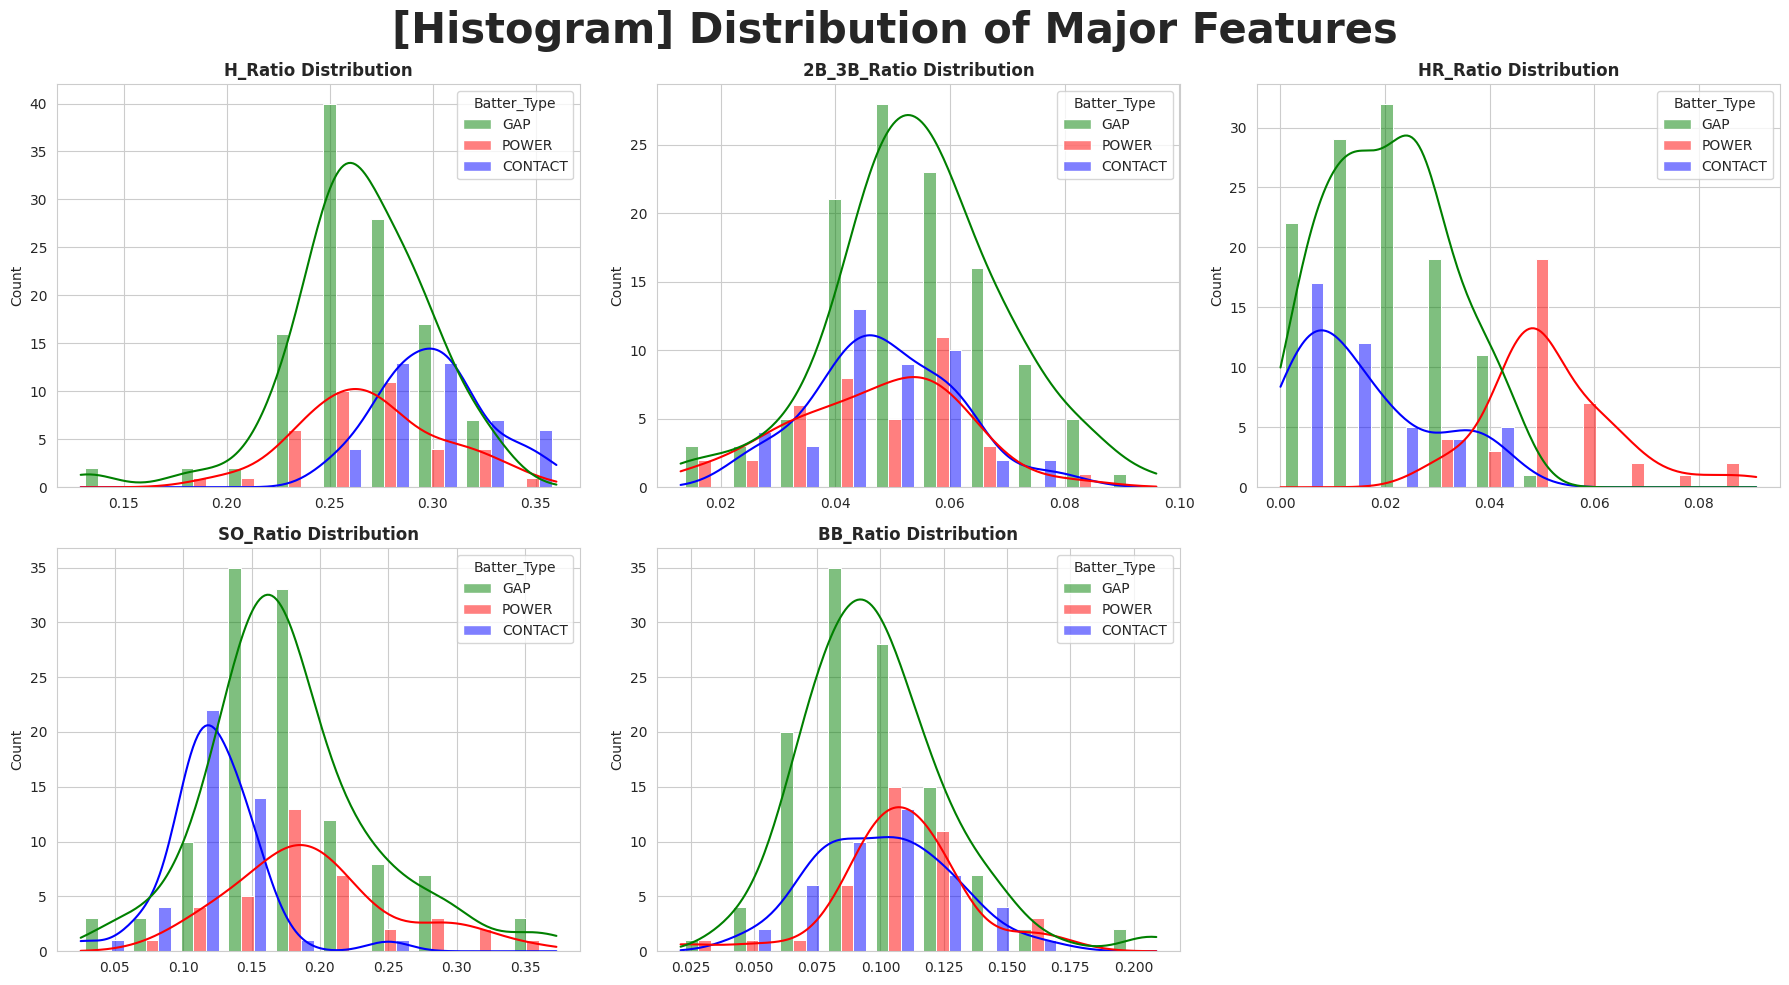

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------------------------------------
# 3. 시각화 : 히스토그램
# ---------------------------------------------------------

print("--- 시각화 (주요 특성) : 히스토그램 ---")

sns.set_style("whitegrid")

viz_features = ['H_Ratio', '2B_3B_Ratio', 'HR_Ratio', 'SO_Ratio', 'BB_Ratio']

my_colors = {'POWER': 'red', 'CONTACT': 'blue', 'GAP': 'green'}

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('[Histogram] Distribution of Major Features', fontsize=30, fontweight='bold')

for i, col in enumerate(viz_features):
    row, col_idx = i // 3, i % 3

    sns.histplot(
        data=df, x=col, hue='Batter_Type', kde=True,
        ax=axes[row, col_idx], palette=my_colors,
        multiple="dodge", shrink=0.8, bins=10
    )

    axes[row, col_idx].set_title(f'{col} Distribution', fontweight='bold')

    axes[row, col_idx].set_xlabel('')

    axes[row, col_idx].set_ylabel('Count')

fig.delaxes(axes[1, 2])

plt.tight_layout()
plt.show()

### 3. 시각화 (히스토그램)

주요 특성에 해당하는 파생 데이터를 대상으로 히스토그램을 활용하여 시각화를 진행하였습니다.

**HR_Ratio**
- 앞선 데이터 분석과 일치하게, 가장 뚜렷한 시각적 분리가 나타납니다.
- CONTACT(파랑) 유형은 왼쪽(낮은 홈런 비율)에 밀집된 반면, POWER(빨강) 유형은 오른쪽(높은 홈런 비율) 구간에 밀집을 넘어 독자적인 분포를 이루고 있습니다.
- 유형 간 겹치는 영역이 가장 적기 때문에, 이 지표가 타격 유형을 구분할 수 있는 가장 강력한 기준이라고 생각합니다. 특히 POWER(빨강) 유형과 다른 유형을 확실하게 구분할 수 있다고 생각합니다.

**SO_Ratio**
- HR_Ratio 다음으로 뚜렷한 시각적 분리가 나타납니다.
- CONTACT(파랑) 유형은 왼쪽(낮은 삼진 비율)에 밀집되어 있어 명확히 구분되나, POWER(빨강) 유형과 GAP(초록) 유형은 다소 겹쳐져 있습니다.
- 그럼에도 불구하고 전체적인 경향성이 뚜렷하므로, 타격 유형을 구분할 수 있는 핵심적인 기준이라고 생각합니다.

**H_Ratio**
- SO_Ratio 다음으로 뚜렷한 시각적 분리가 나타납니다.
- CONTACT(파랑) 유형은 오른쪽(높은 안타 비율)에 밀집되어 있어 명확히 구분되나, POWER(빨강) 유형과 GAP(초록) 유형은 다소 겹쳐져 있습니다.
- 마찬가지로 전체적인 경향성이 뚜렷하므로, SO_Ratio와 함께 타격 유형을 구분할 수 있는 핵심적인 기준이라고 생각합니다.

**2B_3B_Ratio, BB_Ratio**
- 이 두 지표는 세 가지 유형의 그래프가 상당 부분 겹쳐져 있어, 시각적으로 뚜렷한 분리가 나타나지 않습니다.
- 따라서 두 지표가 단독으로는 큰 의미를 가지지 못하지만, 다른 지표들과 함께 결합하여 활용된다면 유의미한 역할을 수행할 수 있을 것이라 생각합니다.

--- 시각화 (주요 특성) : 산점도 ---


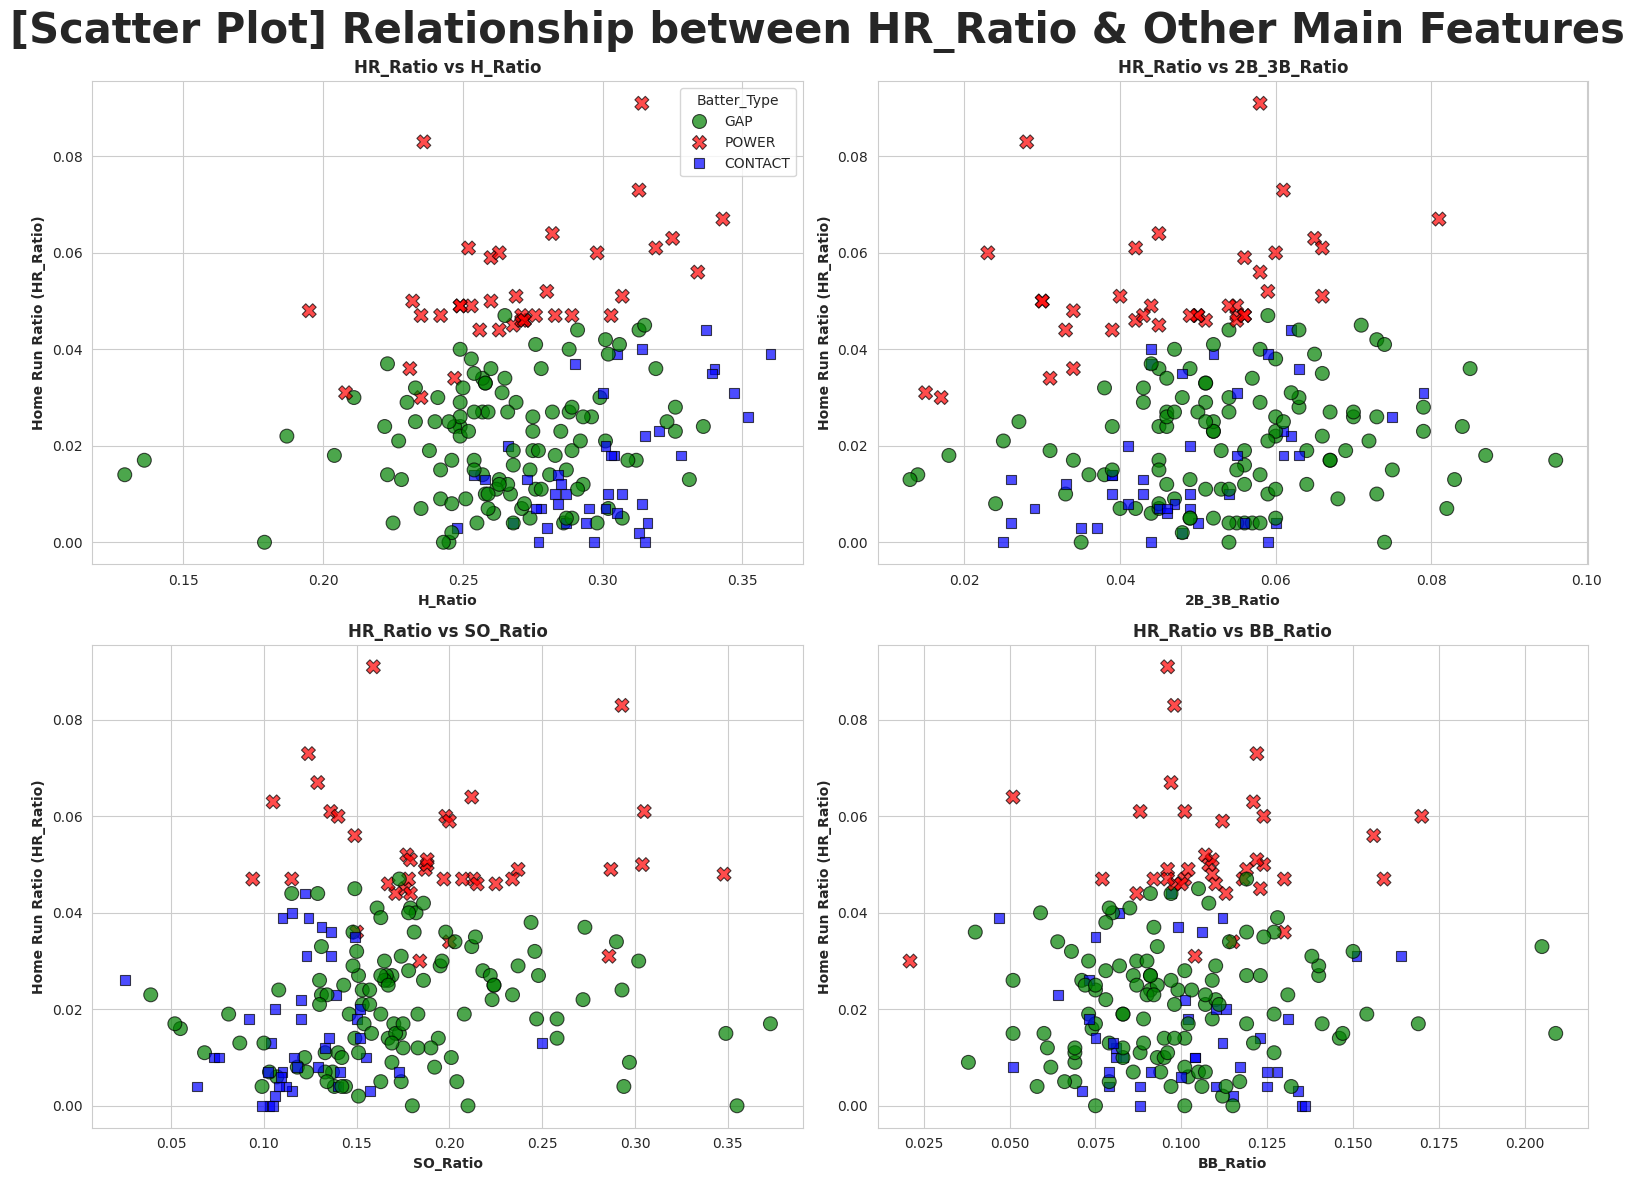

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------------------------------------
# 3. 시각화 : 산점도
# ---------------------------------------------------------

print("--- 시각화 (주요 특성) : 산점도 ---")

sns.set_style("whitegrid")
my_colors = {'POWER': 'red', 'CONTACT': 'blue', 'GAP': 'green'}

x_features = ['H_Ratio', '2B_3B_Ratio', 'SO_Ratio', 'BB_Ratio']

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('[Scatter Plot] Relationship between HR_Ratio & Other Main Features', fontsize=30, fontweight='bold')

axes = axes.flatten()

for i, x_col in enumerate(x_features):
    sns.scatterplot(
        data=df,
        x=x_col,
        y='HR_Ratio',
        hue='Batter_Type',
        style='Batter_Type',
        palette=my_colors,
        s=100,
        alpha=0.7,
        edgecolor='black',
        ax=axes[i],
        legend=(i == 0)
    )

    axes[i].set_title(f'HR_Ratio vs {x_col}', fontweight='bold')

    axes[i].set_xlabel(x_col, fontsize=10, fontweight='bold')
    axes[i].set_ylabel('Home Run Ratio (HR_Ratio)', fontweight='bold')

plt.tight_layout()
plt.show()

### 4. 시각화 (산점도)

주요 특성에 해당하는 파생 데이터를 대상으로 산점도를 활용하여 시각화를 진행하였습니다.

타격 유형을 구분하는 가장 강력한 기준으로 판명된 'HR_Ratio'를 Y축으로 고정하고, 나머지 주요 특성들을 X축에 번갈아 가며 배치하였습니다.

**POWER 유형의 분리**
- 모든 산점도에서 HR_Ratio가 높은 상단 영역에 POWER(빨강) 유형이 독자적인 분포를 이루고 있습니다. 이는 어떤 지표와 결합하더라도 POWER 유형은 확실하게 구분해낼 수 있음을 시사합니다.

**CONTACT 유형과 GAP 유형의 분리**

- H_Ratio & SO_Ratio: 이 두 지표를 X축으로 했을 때는 CONTACT(파랑) 유형과 GAP(초록) 유형이 비교적 명확하게 분리됩니다. 즉, 이 지표들은 세 가지 유형을 구분하는 데 핵심적인 역할을 할 수 있을 것이라 생각합니다.
- 2B_3B_Ratio & BB_Ratio : 이 두 지표를 X축으로 했을 때는 CONTACT(파랑) 유형과 GAP(초록) 유형이 서로 섞여 있습니다. 즉, 이 지표들은 세 가지 유형을 구분하는 데 보조하는 역할을 할 수 있을 것이라 생각합니다.

### 5. 데이터 품질 문제 정리 및 전처리 계획

**데이터 품질 문제**
- 클래스 불균형: 'GAP' 유형이 전체 데이터의 약 58.5%를 차지하여 절반 이상을 차지하는 반면, 'POWER'와 'CONTACT' 유형은 각각 약 20% 내외에 불과합니다.
- 특성별 변별력 차이: 'HR_Ratio', 'SO_Ratio', "H_Ratio'는 타격 유형별 분포가 뚜렷하여 분류 모델의 핵심적인 기준이 될 것으로 확인되었으나, '2B_3B_Ratio', 'BB_Ratio'는 타격 유형별 분포가 뚜렷하지 않아 핵심적인 기준이 될 수는 없을 것 같습니다.

**전처리 계획**
- 데이터 분할 전략: 195개 데이터 중 160개를 Train과 Validation에 Cross-Validation 기법을 적용하여 사용하고, 나머지 35개 데이터는 Test를 위해 별도로 분리할 예정입니다.
- 라벨 인코딩: Batter_Type을 숫자 형태로 변환할 예정입니다. (GAP→0, POWER→1, CONTACT→2)
- Feature 선택: 파생 데이터(H_Ratio, 2B_3B_Ratio, HR_Ratio, SO_Ratio, BB_Ratio)를 모델의 입력 변수(X)로 활용할 예정입니다.
- 이상치 처리: HR_Ratio 등에서 발견된 이상치는 데이터 오류가 아니라, 리그 내 독보적인 능력을 가진 슈퍼스타들의 실제 기록입니다. 이상치 데이터도 타자의 유형을 구분할 수 있는 핵심 정보이므로 제거하지 않고 그대로 사용합니다.

**크레딧**

데이터 분석에 사용한 코드는 Gemini 3 Pro의 도움을 받아서 진행하였습니다.